In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn as sns
from sklearn import datasets
from sklearn import metrics
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, roc_auc_score, f1_score, precision_score, recall_score
os.environ['TF_CPP_MIN_LOG_LEVEL']= '2'

In [ ]:
# !gdown --id '1S9iwczSf6KL5jMSmU20SXKCSD3BUx4o_' --output level-6.csv #GMPR_genus
!gdown --id '1q0yp1iM66BKvqee46bOuSZYwl_SJCTp0' --output level-6.csv #GMPR_species

Downloading...
From: https://drive.google.com/uc?id=1q0yp1iM66BKvqee46bOuSZYwl_SJCTp0
To: /content/level-6.csv
100% 1.67M/1.67M [00:00<00:00, 61.1MB/s]


In [ ]:
train = pd.read_csv("level-6.csv")
train.head()
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 443 entries, 0 to 442
Columns: 1139 entries, index to Diagnosis
dtypes: float64(785), int64(352), object(2)
memory usage: 3.8+ MB


In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
train["Diagnosis"] = labelencoder.fit_transform(train["Diagnosis"])
# test["Diagnosis"] = labelencoder.fit_transform(test["Diagnosis"])
# for i in range(len(train)):
#     if train["Diagnosis"][i] == 'Cancer':
#         train["Diagnosis"][i] = str(1)
#     else:
#         train["Diagnosis"][i] = str(0)
train

,index,Archaea.Euryarchaeota.Methanobacteria.Methanobacteriales.Methanobacteriaceae.Methanobrevibacter.__,Archaea.Euryarchaeota.Methanobacteria.Methanobacteriales.Methanobacteriaceae.Methanosphaera.__,Archaea.Euryarchaeota.Methanomicrobia.Methanosarcinales.Methanosarcinaceae.Methanococcoides.,Archaea.Thermoplasmatota.Thermoplasmata.Methanomassiliicoccales.Methanomassiliicoccaceae.Methanomassiliicoccus.__,Archaea.Thermoplasmatota.Thermoplasmata.Methanomassiliicoccales.Methanomethylophilaceae.Candidatus_Methanomethylophilus.__,Archaea.Thermoplasmatota.Thermoplasmata.Methanomassiliicoccales.Methanomethylophilaceae.uncultured.__,Bacteria.Acidobacteriota.Acidobacteriae.Acidobacteriales.Acidobacteriaceae_.Subgroup_1..Acidobacterium.uncultured_organism,Bacteria.Actinobacteria.Actinobacteria.Actinomycetales.Actinomycetaceae..__,Bacteria.Actinobacteria.Actinobacteria.Corynebacteriales.Corynebacteriaceae.Corynebacterium.,Bacteria.Actinobacteria.Actinobacteria.Propionibacteriales.Propionibacteriaceae.Propionibacterium.,Bacteria.Actinobacteria.Coriobacteriia.Coriobacteriales.Coriobacteriaceae.FCNB.PAC002389,Bacteria.Actinobacteria.Coriobacteriia.Coriobacteriales.Coriobacteriaceae.PAC002528.PAC002528,Bacteria.Actinobacteriota.Actinobacteria.Actinomycetales.Actinomycetaceae.Actinomyces.Actinomyces_graevenitzii,Bacteria.Actinobacteriota.Actinobacteria.Actinomycetales.Actinomycetaceae.Actinomyces.Winkia_neuii,Bacteria.Actinobacteriota.Actinobacteria.Actinomycetales.Actinomycetaceae.Actinomyces.__,Bacteria.Actinobacteriota.Actinobacteria.Actinomycetales.Actinomycetaceae.Actinomyces.human_gut_metagenome,Bacteria.Actinobacteriota.Actinobacteria.Actinomycetales.Actinomycetaceae.Arcanobacterium.Chlamydia_trachomatis,Bacteria.Actinobacteriota.Actinobacteria.Actinomycetales.Actinomycetaceae.Arcanobacterium.uncultured_bacterium,Bacteria.Actinobacteriota.Actinobacteria.Actinomycetales.Actinomycetaceae.F0332.__,Bacteria.Actinobacteriota.Actinobacteria.Actinomycetales.Actinomycetaceae.Mobiluncus.__,Bacteria.Actinobacteriota.Actinobacteria.Actinomycetales.Actinomycetaceae.Trueperella.__,Bacteria.Actinobacteriota.Actinobacteria.Actinomycetales.Actinomycetaceae.Varibaculum.__,Bacteria.Actinobacteriota.Actinobacteria.Actinomycetales.Actinomycetaceae.__.__,Bacteria.Actinobacteriota.Actinobacteria.Bifidobacteriales.Bifidobacteriaceae.Alloscardovia.uncultured_bacterium,Bacteria.Actinobacteriota.Actinobacteria.Bifidobacteriales.Bifidobacteriaceae.Bifidobacterium.Bifidobacterium_bifidum,Bacteria.Actinobacteriota.Actinobacteria.Bifidobacteriales.Bifidobacteriaceae.Bifidobacterium.__,Bacteria.Actinobacteriota.Actinobacteria.Bifidobacteriales.Bifidobacteriaceae.Scardovia.__,Bacteria.Actinobacteriota.Actinobacteria.Corynebacteriales.Corynebacteriaceae.Corynebacterium.Corynebacterium_durum,Bacteria.Actinobacteriota.Actinobacteria.Corynebacteriales.Corynebacteriaceae.Corynebacterium.Corynebacterium_sp._oral_taxon_B00,Bacteria.Actinobacteriota.Actinobacteria.Corynebacteriales.Corynebacteriaceae.Corynebacterium.__,Bacteria.Actinobacteriota.Actinobacteria.Corynebacteriales.Corynebacteriaceae.Lawsonella.__,Bacteria.Actinobacteriota.Actinobacteria.Corynebacteriales.Nocardiaceae.Rhodococcus.__,Bacteria.Actinobacteriota.Actinobacteria.Micrococcales.Micrococcaceae.Glutamicibacter.__,Bacteria.Actinobacteriota.Actinobacteria.Micrococcales.Micrococcaceae.Kocuria.Rothia_kristinae,Bacteria.Actinobacteriota.Actinobacteria.Micrococcales.Micrococcaceae.Kocuria.__,Bacteria.Actinobacteriota.Actinobacteria.Micrococcales.Micrococcaceae.Micrococcus.__,Bacteria.Actinobacteriota.Actinobacteria.Micrococcales.Micrococcaceae.Rothia.Rothia_dentocariosa,Bacteria.Actinobacteriota.Actinobacteria.Micrococcales.Micrococcaceae.Rothia.__,Bacteria.Actinobacteriota.Coriobacteriia.Coriobacteriales.Atopobiaceae.Atopobium.Atopobium_fossor,...,Bacteria.Synergistota.Synergistia.Synergistales.Synergistaceae.Cloacibacillus.__,Bacteria.Synergistota.Synergistia.Synergistales.Synergistaceae.Fretibacterium.Synergi

In [ ]:
not_select = ["index", "Diagnosis"]
train_select = train.drop(not_select,axis=1)
df_final_select = train_select

#Random Forest Classifier

In [ ]:
#Use RandomForestClassifier to predict Cancer
x = df_final_select
y = train["Diagnosis"]
# y = np.array(y,dtype=int)
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

#RandomForest
rfc = RandomForestClassifier(n_estimators=1000)
rfc.fit(X_train,y_train)
y_predict = rfc.predict(X_test)
score_rfc = rfc.score(X_test,y_test)
score_rfc_train = rfc.score(X_train,y_train)
print("train_accuracy = ",score_rfc_train*100," %")
print("val_accuracy = ",score_rfc*100," %")

train_accuracy =  100.0  %
val_accuracy =  82.02247191011236  %


precision =  [0.84210526 0.78125   ]
recall =  [0.87272727 0.73529412]
auc_roc =  0.8040106951871658
f1_score =  0.8073593073593073


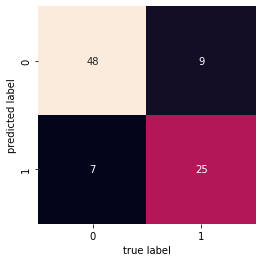

In [ ]:
mat = confusion_matrix(y_test, y_predict)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')
score_recall = recall_score(y_test, y_predict, average=None)
f1score = f1_score(y_test, y_predict, average="macro")
precisionscore = precision_score(y_test, y_predict, average=None)
auc_roc = roc_auc_score(y_test, y_predict)
print("precision = ",precisionscore)
print("recall = ",score_recall)
print("auc_roc = ",auc_roc)
print("f1_score = ",f1score)

with open('RF_result.csv','w') as f:
    f.write('Precision_Normal,Precision_Cancer,Recall_Normal,Recall_Cancer,Auc_Score,F1_Score,')
    f.write('\n')
    f.write(str(precisionscore[0])+','+str(precisionscore[1])+','+str(score_recall[0])+','+str(score_recall[1])+','+str(auc_roc)+','+str(f1score))